In [19]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val*180/np.pi

def plotsa(sa,resonances,labels):
    Nout = len(sa)
    N = sa[0].N
    t, P, e, Pratio, dP, phi1, phi2 = np.zeros(Nout), np.zeros((N,Nout)), np.zeros((N,Nout)), np.zeros((N,Nout)), np.zeros((N,Nout)), np.zeros((N,Nout)), np.zeros((N,Nout)), 
    for i,sim in enumerate(sa):
        ps = sim.particles
        t[i] = sim.t
        for j in range(1,sim.N):
            P[j][i] = ps[j].P
            e[j][i] = ps[j].e
        for j in range(1,sim.N-1):
            Pratio[j][i] = ps[j+1].P/ps[j].P
            res = resonances[j-1]
            p = res[1]
            q = res[0]-res[1]
            resratio = (p+q)/p
            dP[j][i] = Pratio[j][i] - resratio
            phi1[j][i] = wrap((p+q)*ps[j+1].l - p*ps[j].l - q*ps[j+1].pomega)
            phi2[j][i] = wrap((p+q)*ps[j+1].l - p*ps[j].l - q*ps[j].pomega)
        
    fig, axarr = plt.subplots(ncols=2, nrows=3, figsize=(18,10))
    for j in range(1,sim.N):
        axarr[0,0].plot(t, P[j], '.', label=labels[j])
        axarr[0,1].plot(t, e[j], '.', label=labels[j])
    
    for j in range(1,sim.N-1):
        res = resonances[j-1]
        resratio = res[0]/res[1]
        axarr[1,0].plot(t, Pratio[j], '.', label=labels[j+1]+":"+labels[j])
        axarr[1,1].plot(t, np.array(Pratio[j])-resratio, '.', label=labels[j+1]+":"+labels[j])
        axarr[2,0].plot(t, phi1[j], '.', label=labels[j+1]+":"+labels[j])
        axarr[2,1].plot(t, phi2[j], '.', label=labels[j+1]+":"+labels[j])
        axarr[2,0].set_ylim([0.,360])
        axarr[2,1].set_ylim([0.,360])
    for ax in axarr.flatten():
        ax.legend(loc='upper left')
    
    return fig

In [5]:
filename = "4res"
tmax = 5.e6
labels = ['star', 'd', 'e', 'f', 'g']#['star', 'b', 'c', 'd', 'e', 'f', 'g']
resonances = [(3,2),(3,2),(4,3)]#[(4,3),(3,2),(3,2),(3,2),(4,3)]

#Nruns = 48
#taue0min = 1.e2
#taue0max = 1.e8
#taue0s = np.logspace(np.log10(taue0min), np.log10(taue0max), Nruns)
taue0s = np.logspace(8, 4, 16)

In [6]:
import numpy as np
import rebound
import reboundx
filename = "6res"
tmax = 5.e6
labels = ['b', 'c', 'd', 'e', 'f', 'g']
resonances = [(3,2),(3,2),(3,2),(3,2),(4,3)]

taue0s = np.logspace(8, 2, 13)

100.0


/mnt/raid-cita/dtamayo/rebound/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)
/mnt/raid-cita/dtamayo/reboundx/reboundx/extras.py:61: RuntimeWarning: REBOUNDx Warning: Binary file was saved with a different version of REBOUNDx. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)


IndexError: list index out of range

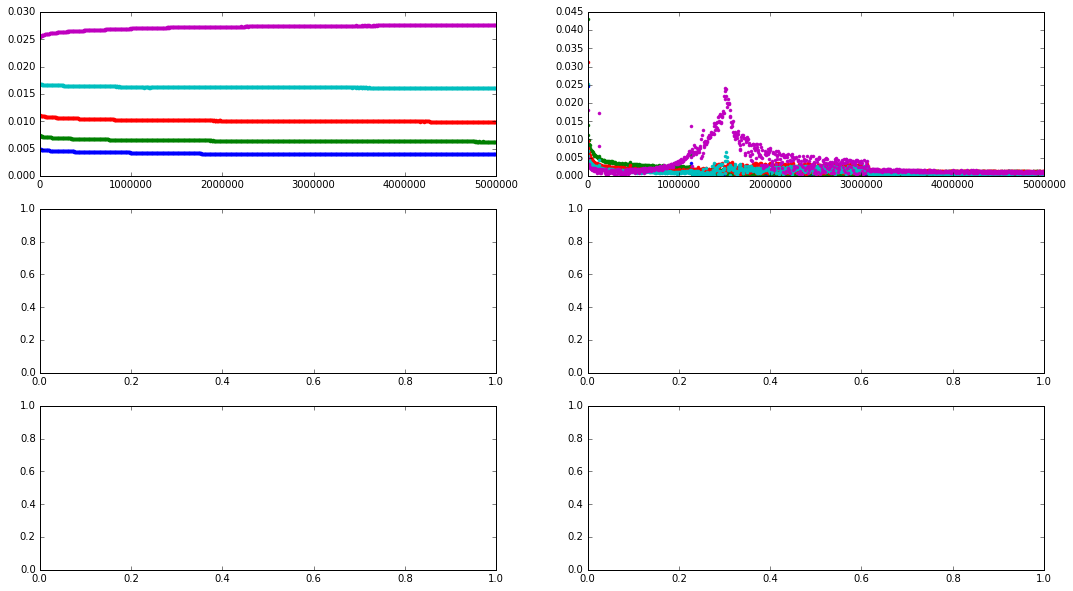

In [21]:
taue0 = taue0s[-1]
print(taue0)
sa = rebound.SimulationArchive("data/old/"+filename+"archive"+"{0:.2e}".format(taue0)+".bin", rebxfilename = "data/old/"+filename+"rebx"+"{0:.2e}".format(taue0)+".bin")
plotsa(sa,resonances,labels);

In [1]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val*180/np.pi

def initialize(planets, resonances):
    t, e, P, pomega, longitude, Pratio, phi1, phi2 = {}, {}, {}, {}, {}, {}, {}, {}

    for label in planets:
        t[label] = []
        e[label] = []
        P[label] = []
        pomega[label] = []
        longitude[label] = []

    for pair in resonances.keys():
        t[pair] = []
        Pratio[pair] = []
        phi1[pair] = []
        phi2[pair] = []
        
    return t, e, P, pomega, longitude, Pratio, phi1, phi2

def output(sim, time,planets,resonances,t,e,P,pomega,longitude,Pratio,phi1,phi2):
    ps = sim.particles
    for p in planets:
        try:
            e[p].append(ps[p].e)
            P[p].append(ps[p].P)
            pomega[p].append(ps[p].pomega)
            longitude[p].append(ps[p].l)  
            t[p].append(time)
        except:
            pass
    for resonance in resonances.items():
        pair = resonance[0]
        p1 = pair[0]
        p2 = pair[1]
        res = resonance[1]
        p = res[1]
        q = res[0]-res[1]
        try:
            Pratio[pair].append(ps[p2].P/ps[p1].P)
            phi1[pair].append(wrap((p+q)*ps[p2].l - p*ps[p1].l - q*ps[p2].pomega))
            phi2[pair].append(wrap((p+q)*ps[p2].l - p*ps[p1].l - q*ps[p1].pomega))
            t[pair].append(time)   
        except:
            pass
        
def plotsanew(sa,planets,resonances):
    Nout = len(sa)
    N = sa[0].N
    
    t, e, P, pomega, longitude, Pratio, phi1, phi2 = initialize(planets, resonances)
    for i,sim in enumerate(sa):
        ps = sim.particles
        output(sim,sim.t,planets,resonances,t,e,P,pomega,longitude,Pratio,phi1,phi2)
    
    fig, axarr = plt.subplots(ncols=2, nrows=3, figsize=(18,10))
    for p in planets:
        axarr[0,0].plot(t[p], P[p], '.', label=p)
        axarr[0,1].plot(t[p], e[p], '.', label=p)
    for resonance in resonances.items():
        pair = resonance[0]
        res = resonance[1]
        resratio = res[0]/res[1]
        axarr[1,0].plot(t[pair], Pratio[pair], '.', label=pair)
        axarr[1,1].plot(t[pair], np.array(Pratio[pair])-resratio, '.', label=pair)
        axarr[2,0].plot(t[pair], phi1[pair], '.', label=pair)
        axarr[2,1].plot(t[pair], phi2[pair], '.', label=pair)
        axarr[2,0].set_ylim([0.,360])
        axarr[2,1].set_ylim([0.,360])
    for ax in axarr.flatten():
        ax.legend(loc='upper left')
    return fig

In [3]:
from collections import OrderedDict
filename = "bcnonres"
planets = ['b', 'c', 'd', 'e', 'f', 'g']
resonances = OrderedDict([(('d','e'),(3,2)),(('e','f'),(3,2)),(('f','g'),(4,3))]) # ordered so we add planets in right sequence

IC1K6.8241e+01mag3.1906e-01.bin


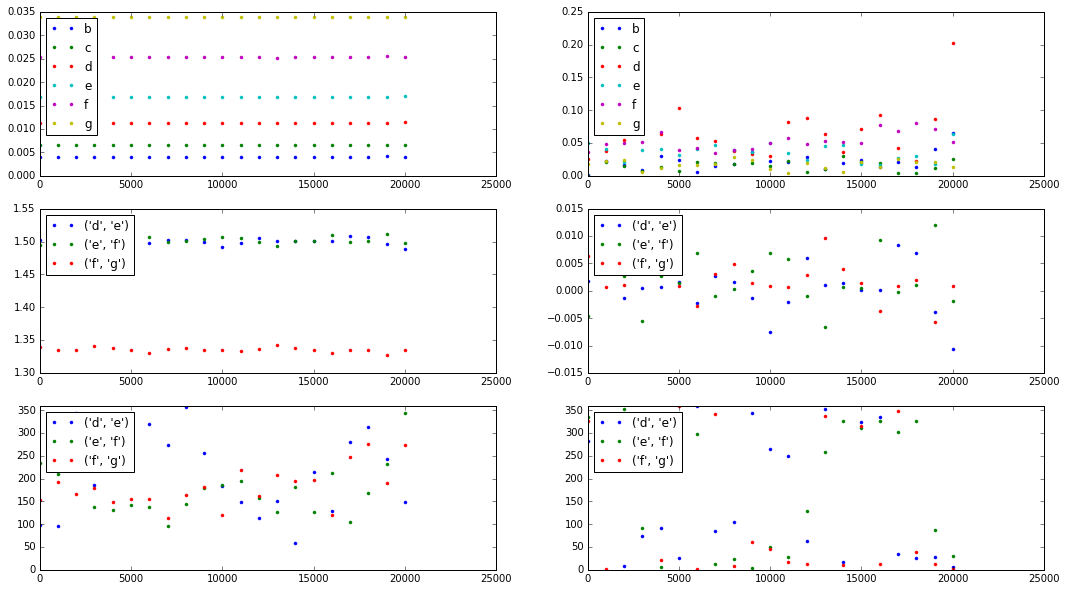

In [4]:
simID=1
import os
for filename in os.listdir('data/'):
    if filename.startswith("IC{0}K".format(simID)):
        print(filename)
        sa = rebound.SimulationArchive('data/'+filename)
plotsanew(sa,planets,resonances);